---
title: "Clustering"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: false
    html-math-method: katex
jupyter: python3
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

***Clustering*** refers to a very broad set of techniques for finding **subgroups**, or **clusters**, in a data set.

> We seek a ***partition of the data*** into distinct groups or clusters so that the ***observations within each group are quite similar to each other.***

- To make this concrete, we must define *what it means for two or more observations to be similar or different*.
- Indeed, this is often a domain-specific consideration that must be made based on knowledge of the data being studied.

This is an **unsupervised problem** because we are trying to discover structure—in this case, distinct clusters—on the basis of a data set.

**Two Clustering Methods**

1. ***K-means clustering***: Here we seek to partition the observations into a **pre-specified number of clusters**.
2. ***Hierarchical Clustering***: Here we do not know in advance how many clusters we want; in fact, we end up with a tree-like visual representation of the observations, called a *dendrogram*, that allows us to view at once the clusterings obtained for each possible number of clusters, from $1$ to $n$.

Let us generate some data such that we can try different clustering algorithms. We want to generate 600 data points in a two-dimensional space gathered into three fairly separated clusters.

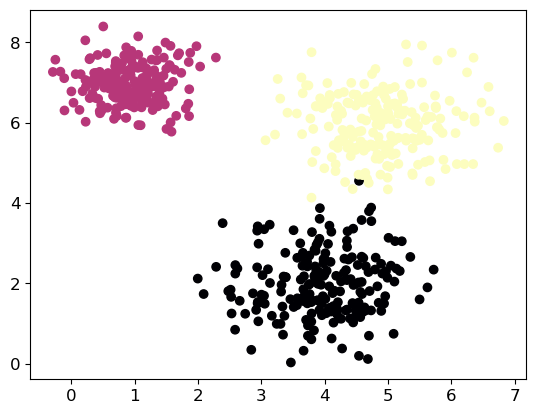

In [5]:
#| label: fig-data-plot
#| fig-cap: Generated Data gathered into three clusters
#| code-fold: true
from sklearn.datasets import make_blobs

plt.rcParams['font.size'] = 12

# Define cluster centers and standard deviations
centers = [[4, 2], [1, 7], [5, 6]]
cluster_std = [0.8, 0.5, 0.7]

# Generate synthetic data
X, labels = make_blobs(n_samples=600, centers=centers, cluster_std=cluster_std, random_state=23)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='magma')
plt.show()

In [9]:
#| label: tbl-raw-dataset
#| tbl-cap: Synthetic Dataset
#| code-fold: true
pd.DataFrame(X).head()

,0,1
0,3.666363,0.322203
1,4.142521,5.438357
2,1.268230,6.913186
3,4.031165,2.311944
4,4.023620,1.255792


# $k$-Means Clustering

Simple algorithm to partition a dataset into $K$ distinct, non-overlapping clusters. It’s an estimation method that is also iterative.

> **Main Idea**: The idea behind K-means clustering is that a *good clustering* is one for which the ***within-cluster variation is as small as possible**.*

We minimize certain objective function: the **within-cluster variation**. We need to define the within-cluster variation. The most common choice involves Squared Euclidean Distance. 

To perform K-means clustering, we must first **pre-specify the desired number of clusters** $K$; then the K-means algorithm will assign each observation to exactly one of the $K$ clusters.

Applying $k$-means with `scikit-learn` is quite straightforward. Here, we apply it to the synthetic data that we used for the preceding plots. We instantiate the `KMeans` class, and set the number of clusters we are looking for $k=3$. Then we call the fit method with the data:

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Build k-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

KMeans(n_clusters=3, random_state=0)

During the algorithm, each training data point in $X$ is assigned a cluster label. You can find these labels in the `kmeans.labels_` attribute:

In [15]:
labels = kmeans.labels_
pd.DataFrame(labels, columns=['cluster']).head()

,cluster
0,1
1,0
2,2
3,1
4,1


Let's plot our results:

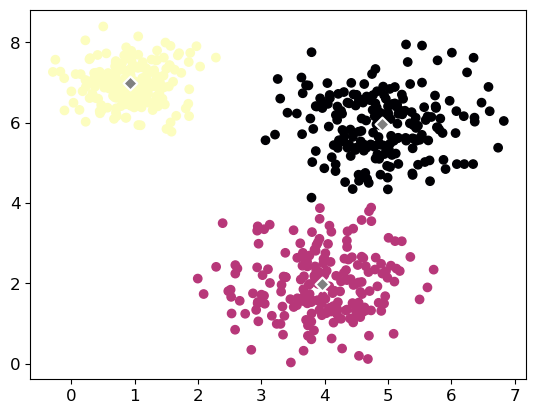

In [33]:
#| label: fig-kmeans1
#| fig-cap: K-Means Results
#| code-fold: true

# Figure
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='magma')

#Centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            facecolors='grey' ,marker="D", edgecolors='white', linewidth=1.5, s=50);

## Number of Cluster

### Silhouette Coefficient

The silhouette width is obtained by the `silhouette_samples` function from the `sklearn.metrics` module. By default, scikit-learn sets the metric to `'euclidean'` but, if desired, this can be changed by setting metric parameter:

In [46]:
# Silhouette 
silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score =', silhouette.round(7))

Silhouette Score = 0.6974909


Text(0.5, 1.0, 'Silhouette Score = 0.70')

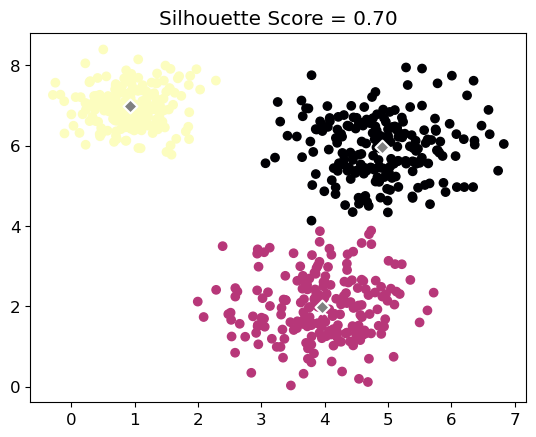

In [42]:
#| label: fig-silhouette1
#| fig-cap: K-Means with Silhouette Score
#| code-fold: true
from sklearn import metrics

# Figure
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='magma')

#Centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            facecolors='grey' ,marker="D", edgecolors='white', linewidth=1.5, s=50);

# Silhouette 
silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
plt.title(f'Silhouette Score = {silhouette:.2f}')


Let's run different $k$-means algorithm of different $k$ and calculate their corresponding silhouette scores:

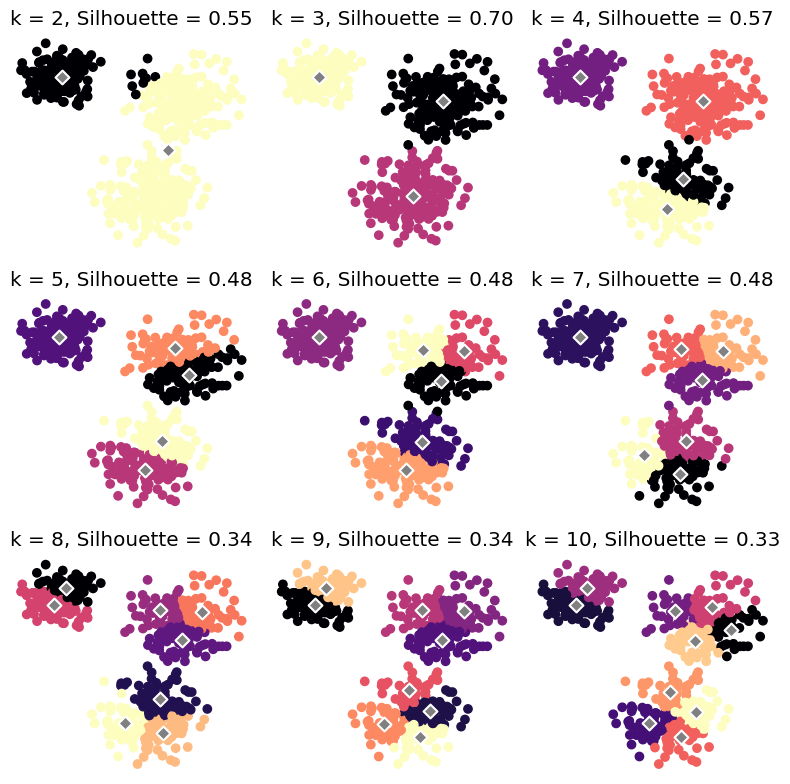

In [49]:
#| label: fig-silhouette2
#| fig-cap: K-Means with Silhouette Score, at different levels of k
from sklearn.cluster import KMeans
from sklearn import metrics

# Set up the loop and plot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.reshape(-1)
k_values = range(2, 11)

for k, ax in zip(k_values, axes):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='magma')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               facecolors='grey' ,marker="D", edgecolors='white', linewidth=1.5, s=50)
    
    silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
    ax.set_title(f'k = {k}, Silhouette = {silhouette:.2f}')
    ax.axis('off')

fig.tight_layout()
plt.show()

In any case, the optimal number of clusters id $k=3$.

### Elbow Criteria

To select the optimal number of clusters for $k$-means clustering, we can implement the **“elbow” method**. The elbow method runs $k$-means clustering on the dataset for a range of values for k (say from 2-10) and then, for each value of $k$,computes an average score for all clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for $k$. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of $k$. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

Let’s compute first the mean **silhouette coefficient**:

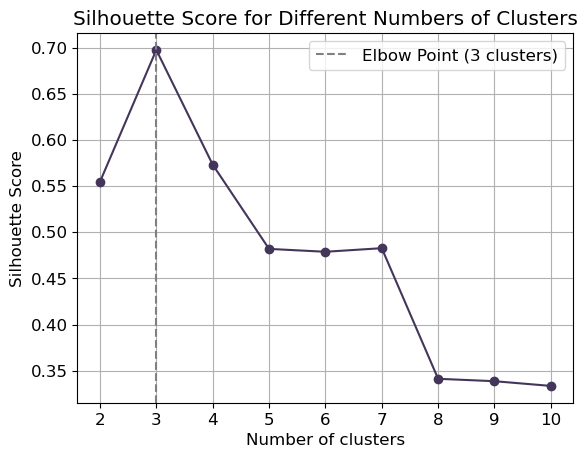

In [53]:
#| label: fig-elbow1
#| fig-cap: Elbow Method with Silhouette Criteria
from sklearn.cluster import KMeans
from sklearn import metrics

k_values = range(2, 11)

# Store silhouette scores
silhouette_scores = []

# Iterate through each k
for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
    
    # Append silhouette score to list
    silhouette_scores.append(silhouette)

# Plotting
plt.plot(k_values, silhouette_scores, marker='o', color='#44355b')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(k_values)
plt.grid(True)

# Find elbow point
diffs = np.diff(silhouette_scores)
elbow_point = k_values[np.argmax(diffs) + 1]
plt.axvline(x=elbow_point, color='grey', linestyle='--', label=f'Elbow Point ({elbow_point} clusters)')
plt.legend()

plt.show()

Instead of using silhouette score, we can use the **squared error** obtained by default from the `kmeans.score()` method:

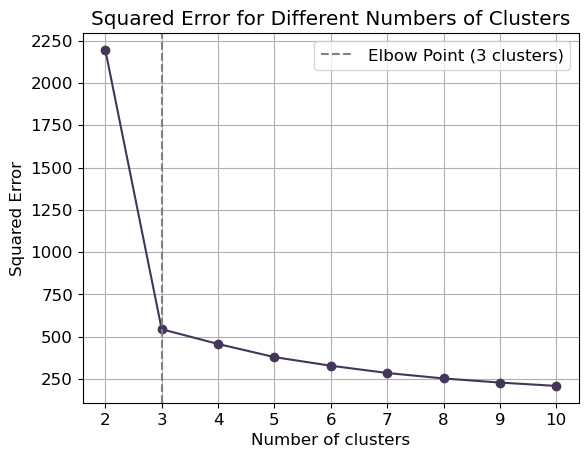

In [55]:
#| label: fig-elbow2
#| fig-cap: Elbow Method with Squared Error Criteria
#| code-fold: true
from sklearn.cluster import KMeans

# Range of cluster numbers to try
k_values = range(2, 11)

# Store squared errors
squared_errors = []

# Iterate through each k
for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # Calculate squared error (inertia)
    squared_error = kmeans.score(X)
    
    # Append squared error to list
    squared_errors.append(-squared_error)  # Invert sign for plotting, as KMeans score returns negative value

# Plotting
plt.plot(k_values, squared_errors, marker='o', c='#44355b')
plt.xlabel('Number of clusters')
plt.ylabel('Squared Error')
plt.title('Squared Error for Different Numbers of Clusters')
plt.xticks(k_values)
plt.grid(True)

# Find elbow point
diffs = np.diff(squared_errors)
elbow_point = k_values[np.argmin(diffs) + 1]
plt.axvline(x=elbow_point, color='grey', linestyle='--', label=f'Elbow Point ({elbow_point} clusters)')
plt.legend()

plt.show()


# Hierarchical Clustering

One potential disadvantage of *K-means clustering is that it requires us to pre-specify the number of clusters K*. 

**Hierarchical clustering** is an alternative approach which does not require that we commit to a particular choice of K. 

Hierarchical clustering has an added advantage over K-means clustering in that ***it results in an attractive tree-based representation of the observations***, called a ***dendrogram***.

The hierarchical clustering dendrogram is obtained via an extremely simple algorithm. 

> **Pairwise Dissimilarity**: We begin by defining some sort of ***dissimilarity measure between each pair of observations*** (Euclidean distance). The algorithm proceeds iteratively. 

1. Starting out at the bottom of the dendrogram, each of the ***$n$ observations is treated as its own cluster***. 
2. The ***two clusters that are most similar to each other*** **are then fused** so that there now are $n−1$ clusters. 
3. Next the two clusters that are most similar to each other are ***fused again***, so that there now are $n − 2$  clusters. 
4. The algorithm proceeds in this fashion until all of the observations belong to one single cluster, and the dendrogram is complete.

We will use the data to plot the hierarchical clustering dendrogram using complete, single, average and ward linkage clustering, with Euclidean distance as the dissimilarity measure:

In [70]:
#| code-fold: true
from sklearn.datasets import make_blobs

# Define cluster centers and standard deviations
centers = [[4, 2], [1, 7], [5, 6]]
cluster_std = [0.8, 0.5, 0.7]
# Generate synthetic data
X, labels = make_blobs(n_samples=600, centers=centers, cluster_std=cluster_std, random_state=23)

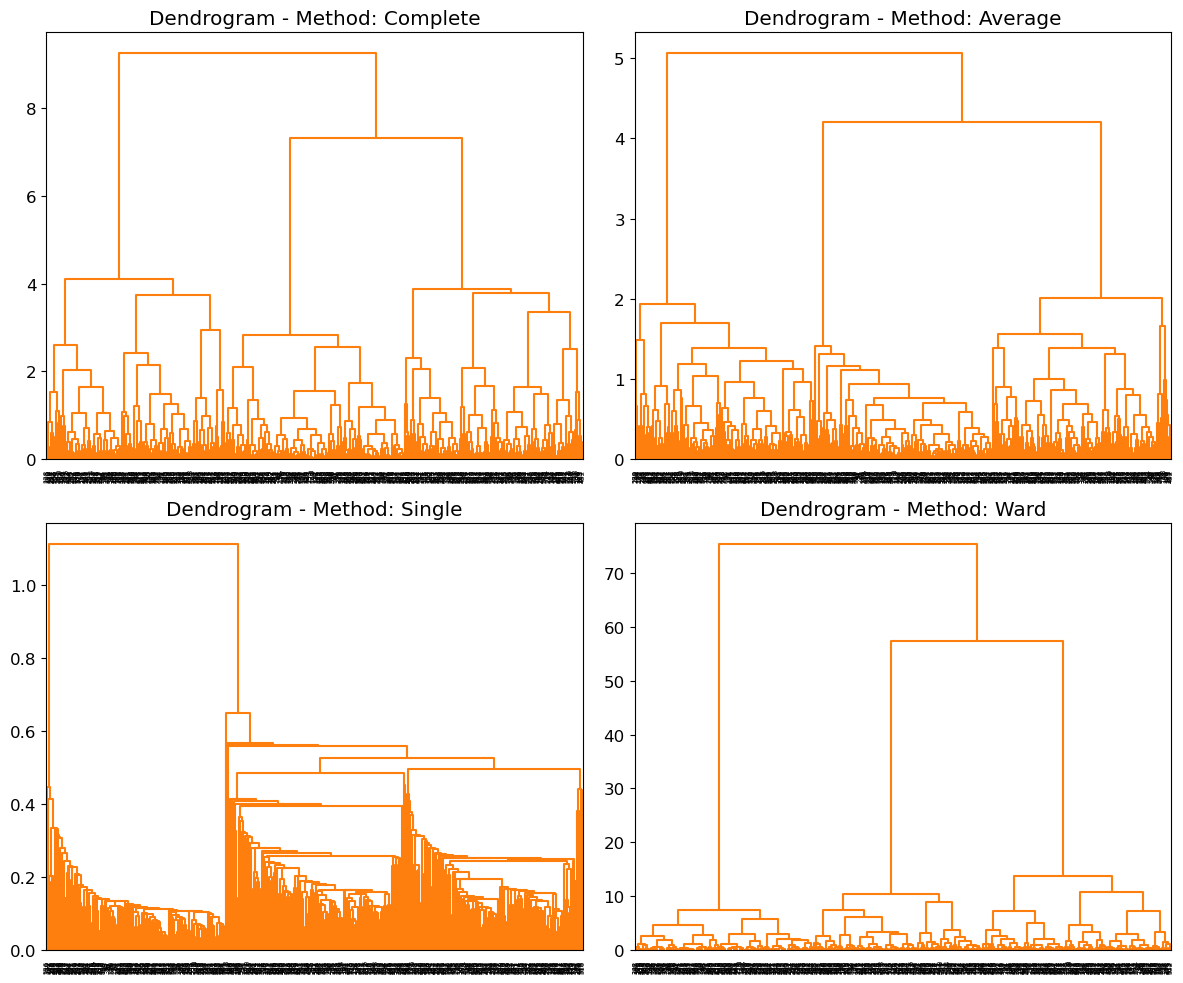

In [71]:
#| label: fig-hierarchical1
#| fig-cap: Dendogram, by Linkage Method

# Define linkage methods
linkage_methods = ['complete', 'average', 'single', 'ward']

# Plot dendrograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    row = i // 2
    col = i % 2
    
    # Compute linkage matrix
    Z = linkage(X, method=method)
    
    # Plot dendrogram
    dendrogram(Z, ax=axes[row, col], color_threshold=np.inf, above_threshold_color='black')
    axes[row, col].set_title(f'Dendrogram - Method: {method.capitalize()}')

plt.tight_layout()
plt.show()

If we define $k=3$, we have:

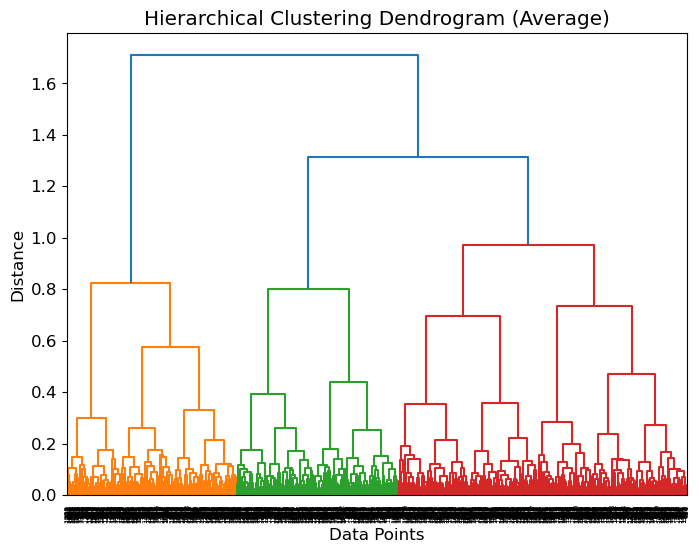

In [79]:
#| label: fig-hierarchical2
#| fig-cap: Dendogram (Average, k=3)
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='average')  # You can also try other linkage methods

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Number of Clusters

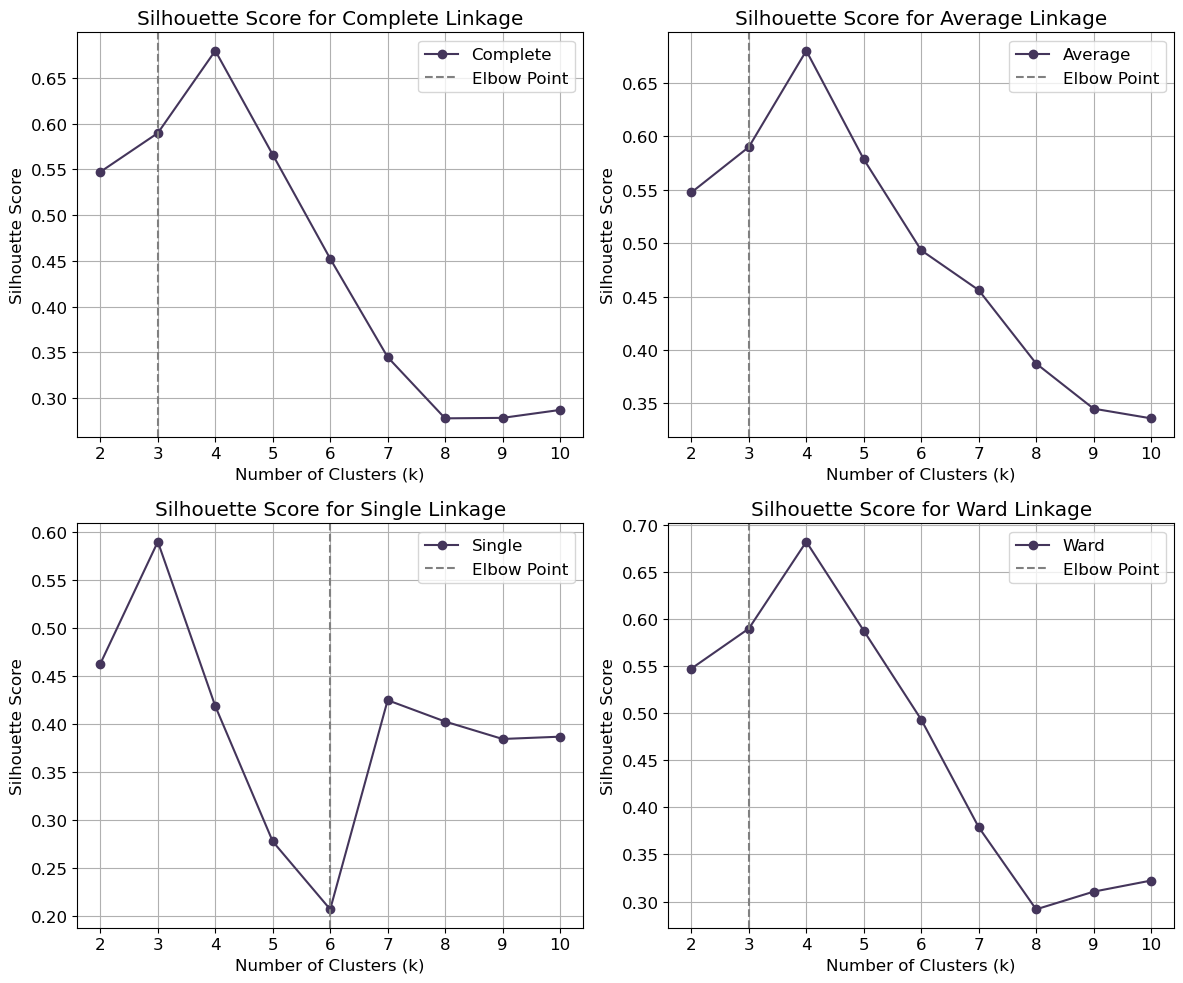

In [83]:
#| label: fig-elbow3
#| fig-cap: Elbow Method with Silhouette Criteria

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define methods of linkage
linkage_methods = ['complete', 'average', 'single', 'ward']

# Define range of cluster numbers (k)
k_values = range(2, 11)

# Create subplots for each method of linkage
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Compute silhouette coefficient for each method of linkage and each k
for method, ax in zip(linkage_methods, axes.flatten()):
    silhouette_scores = []
    for k in k_values:
        # Perform hierarchical clustering
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = clustering.fit_predict(X)
        
        # Compute silhouette coefficient
        silhouette = silhouette_score(X, labels)
        silhouette_scores.append(silhouette)
    
    # Plot silhouette scores for the current method of linkage
    ax.plot(k_values, silhouette_scores, color='#44355b', marker='o', label=method.capitalize())
    ax.set_title(f'Silhouette Score for {method.capitalize()} Linkage')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Silhouette Score')
    ax.set_xticks(k_values)
    ax.grid(True)
    
    # Find elbow point
    diffs = np.diff(silhouette_scores)
    elbow_point = k_values[np.argmax(diffs)] if np.any(diffs) else k_values[0]
    
    # Plot vertical gray line at the elbow point
    ax.axvline(x=elbow_point, color='grey' , linestyle='--', label='Elbow Point')
    ax.legend()

plt.tight_layout()
plt.show()

# Spectral Clustering

When you have complex-shaped data that's hard to cluster, you can use spectral clustering. This method uses a similarity matrix to find patterns in the data. Think of it as a way to simplify the data before grouping it. The similarity matrix tells you how similar each pair of data points is.

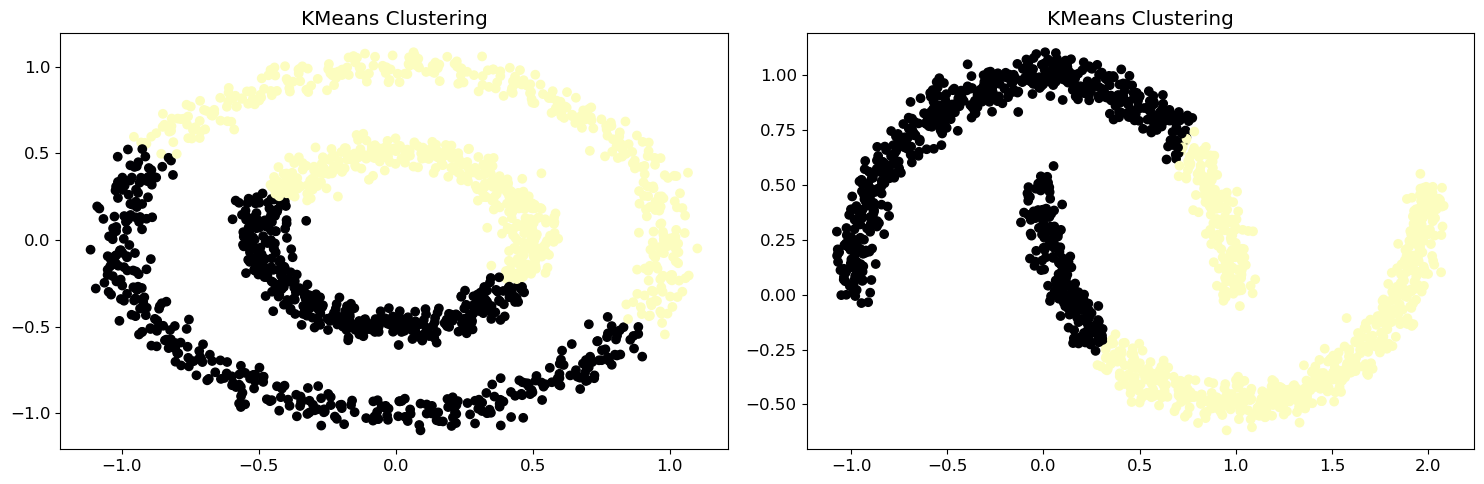

In [67]:
#| label: fig-complex1
#| fig-cap: k-Means in Complex-shaped data

from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import KMeans

plt.rcParams['font.size'] = '12'

# Generate more complex synthetic data: Circles and Moons
X1, _ = make_circles(factor=0.5, noise=0.05, n_samples=1500)
X2, _ = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

for i, X in enumerate([X1, X2]):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    cluster_labels = kmeans.labels_
    
    # Plot data with magma colors
    ax[i].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='magma')
    ax[i].set_title('KMeans Clustering')

plt.tight_layout()
plt.show()

It is clear that the **current method** ($k$-means clustering) cannot group moons and circles effectively.  It is time to call **spectral clustering methods**:

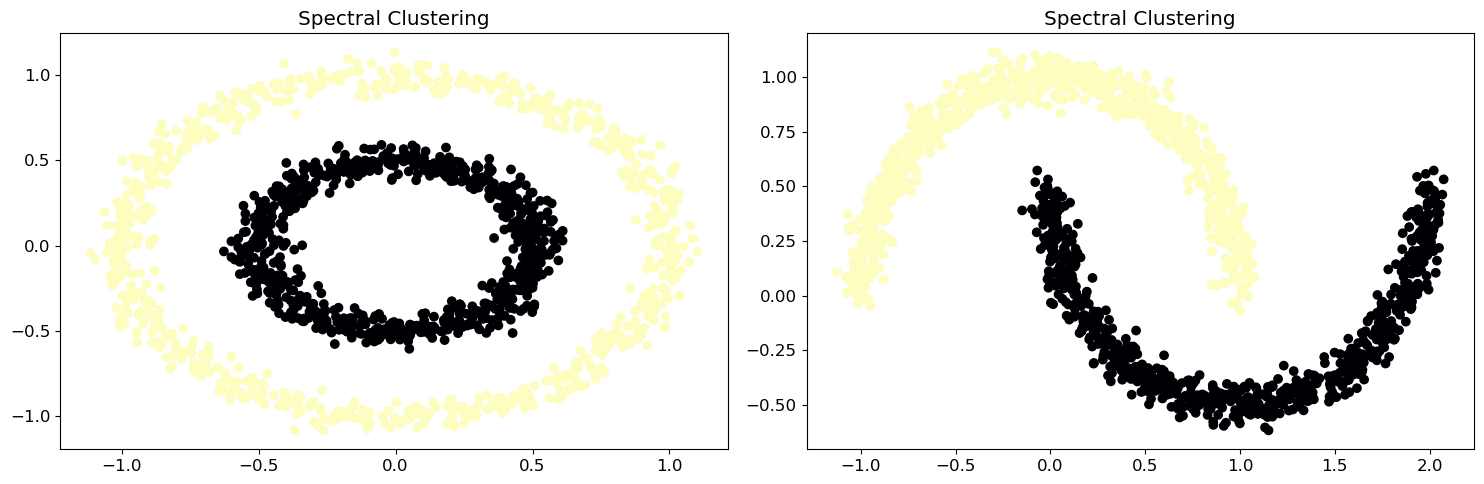

In [68]:
#| label: fig-complex2
#| fig-cap: Spectral Clustering in Complex-shaped data

from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import SpectralClustering

plt.rcParams['font.size'] = '12'

# Generate more complex synthetic data: Circles and Moons
X1, _ = make_circles(factor=0.5, noise=0.05, n_samples=1500)
X2, _ = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

for i, X in enumerate([X1, X2]):
    # Apply spectral clustering
    spectral_cluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
    cluster_labels = spectral_cluster.fit_predict(X)
    
    # Plot data with magma colors
    ax[i].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='magma')
    ax[i].set_title('Spectral Clustering')

plt.tight_layout()
plt.show()
